In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler



df = pd.read_csv('day.csv')

## Borrar variables

In [2]:
df = df.drop(columns=['casual','registered','instant','dteday','mnth','yr'])
target = 'cnt'
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Dummies

In [3]:
df = pd.get_dummies(df, columns=['season','weathersit','weekday'])
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,True,False,False,...,True,False,False,False,True,False,False,False,False,False
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,True,False,False,...,True,False,False,False,False,False,True,False,False,False


## Visualizar datos

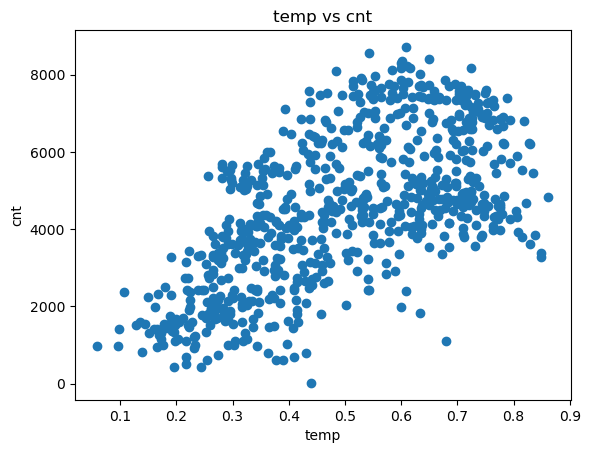

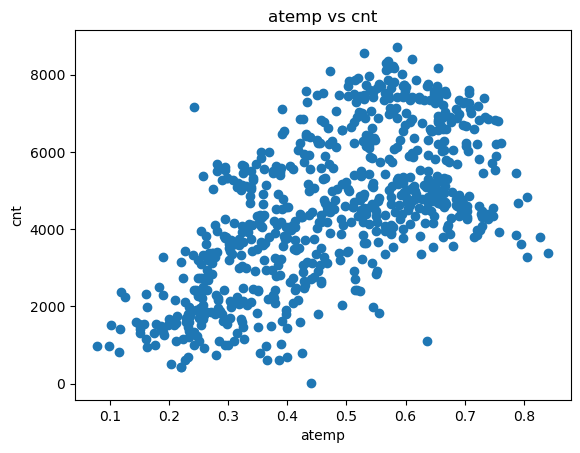

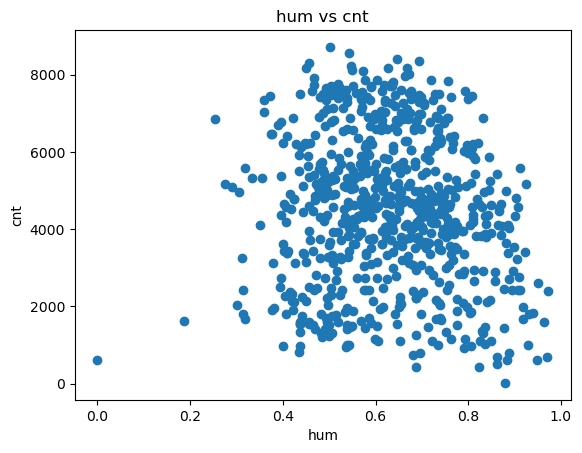

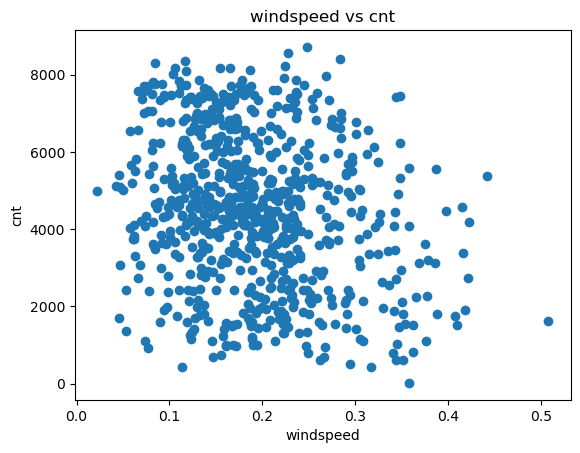

In [4]:
num_features = ['temp','atemp','hum','windspeed']

for i in num_features:
    plt.scatter(df[i],df['cnt'])
    plt.title(f'{i} vs cnt')
    plt.xlabel(i)
    plt.ylabel('cnt')
    plt.show()

## Análisis bivariado

In [5]:
df_numerical = df[['temp','atemp','hum','windspeed','cnt']]
df_numerical = df_numerical.copy()

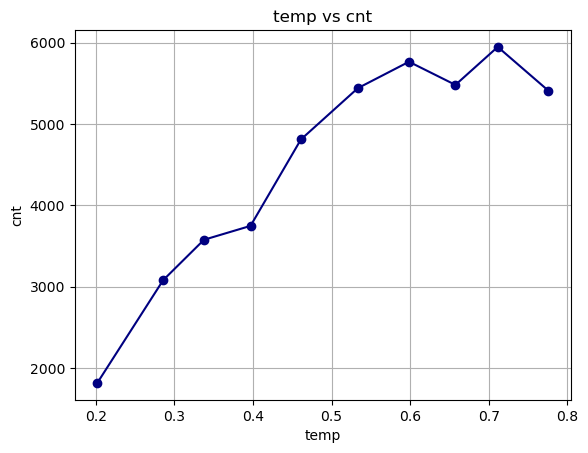

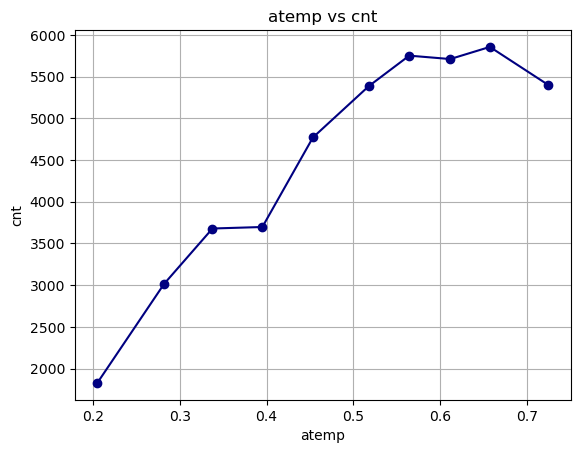

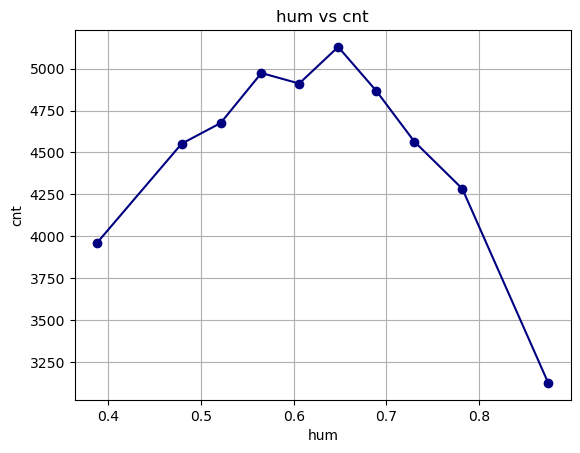

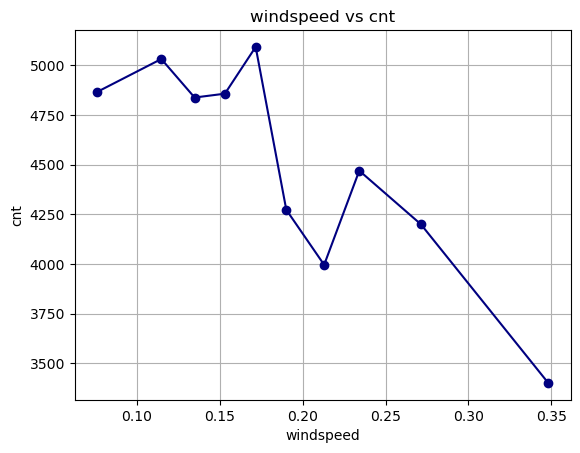

In [6]:
for feature in num_features:
    df_numerical[f'{feature}_bins'] = pd.qcut(df_numerical[feature], q=10, labels=False) + 1
    grouped = df_numerical.groupby(f'{feature}_bins').mean()
    plt.plot(grouped[feature], grouped['cnt'], marker='o', c='navy')
    plt.title(f'{feature} vs cnt')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.grid()
    plt.show()

In [7]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q = bins, labels=False) + 1
    grouped = df_calibracion.groupby('bins').mean()
    plt.plot(grouped.predicciones, grouped.y, marker='o', label = 'Modelo', color = 'blue')
    plt.plot(grouped.predicciones, grouped.predicciones, marker='o', label = 'Real', color = 'red')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.legend()
    plt.grid()

## Modelos

In [8]:
X = df.copy()
X = X.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.2, random_state=42)

### Regresión Lineal Múltiple

In [9]:
model_linear = linear_model.LinearRegression().fit(X_train, y_train)
predicciones_lineal = model_linear.predict(X_test)
r2_score(y_pred = predicciones_lineal, y_true = y_test)

0.5546923653188565

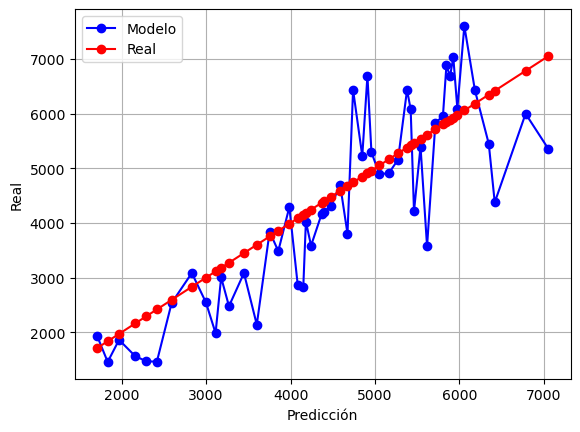

In [10]:
calibracion(predicciones_lineal, y_test, 50)

Este sería el modelo base, el cual cuenta con un r2 de 0.5546, y como apreciamos en la gráfica de calibración es bastante malo y falla en muchas predicciones, el objetico será ir construyendo mejores modelo que sean mejores a este, ya sea con otros modelos y modificando y agregando nuevas variables.

### Regresión Lineal Múltiple Estandarizada

In [11]:
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_linear = linear_model.Ridge().fit(X_train, y_train)
predicciones_lineal_est = model_linear.predict(X_test)
r2_score(y_pred = predicciones_lineal_est, y_true = y_test)

0.5555629658192583

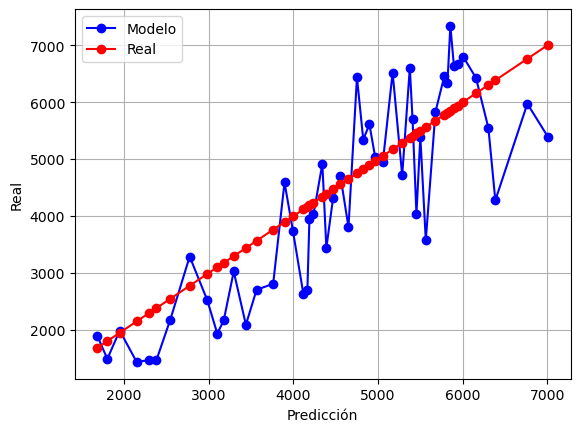

In [12]:
calibracion(predicciones_lineal_est, y_test, 50)

In [13]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly_2 = poly_features.fit_transform(X_train)
X_test_poly_2 = poly_features.fit_transform(X_test)

model_poly_2 = linear_model.LinearRegression()
model_poly_2.fit(X_train_poly_2, y_train)

predicciones_poly_2 = model_poly_2.predict(X_test_poly_2)
r2_score(y_pred = predicciones_poly_2, y_true = y_test)

-6.882065574960028e+24

In [14]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly_3 = poly_features.fit_transform(X_train)
X_test_poly_3 = poly_features.fit_transform(X_test)

model_poly_3 = linear_model.LinearRegression()
model_poly_3.fit(X_train_poly_3, y_train)

predicciones_poly_3 = model_poly_3.predict(X_test_poly_3)
r2_score(y_pred = predicciones_poly_3, y_true = y_test)

-2.4974830834633118e+19